# Lab | Handling Data Imbalance in Classification Models

### Import the required libraries and modules that you would need.

In [191]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

### Read that data into Python and call the dataframe churnData.

In [192]:
churn = pd.read_csv('Customer-Churn.csv')
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


### Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [193]:
# check dtypes
churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [194]:
#change the type
churn["TotalCharges"] = pd.to_numeric(churn["TotalCharges"], errors='coerce')

In [195]:
#check the change
churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Check for null values in the dataframe. Replace the null values.

In [196]:
# check for NaN
churn.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [197]:
# see where we have the highest count
churn["TotalCharges"].value_counts()

20.20      11
19.75       9
20.05       8
19.65       8
19.90       8
           ..
6424.70     1
1474.35     1
6668.35     1
6096.90     1
5867.00     1
Name: TotalCharges, Length: 6530, dtype: int64

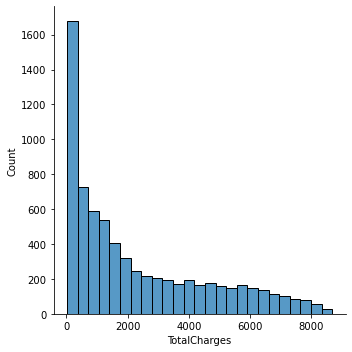

In [198]:
# as it is not categorical, i plot and see the dist in the data.
sns.displot(churn[churn["TotalCharges"].isna()==False]['TotalCharges'])

In [199]:
# i will fill the nans with the mean after seeing the plot

churn["TotalCharges"] = churn["TotalCharges"].fillna(np.mean(churn["TotalCharges"]))

churn.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

In [200]:
churn_feat = pd.DataFrame(churn[["TotalCharges","tenure","SeniorCitizen","MonthlyCharges"]])

churn_feat

,TotalCharges,tenure,SeniorCitizen,MonthlyCharges
0,29.85,1,0,29.85
1,1889.50,34,0,56.95
2,108.15,2,0,53.85
3,1840.75,45,0,42.30
4,151.65,2,0,70.70
...,...,...,...,...
7038,1990.50,24,0,84.80
7039,7362.90,72,0,103.20
7040,346.45,11,0,29.60
7041,306.60,4,1,74.40


### Scale the features either by using normalizer or a standard scaler.

In [201]:
scaler = MinMaxScaler()

churn_feat_scaled = scaler.fit_transform(churn_feat)

churn_feat_df = pd.DataFrame(churn_feat_scaled, columns = churn_feat.columns)

churn_feat_df

,TotalCharges,tenure,SeniorCitizen,MonthlyCharges
0,0.001275,0.013889,0.0,0.115423
1,0.215867,0.472222,0.0,0.385075
2,0.010310,0.027778,0.0,0.354229
3,0.210241,0.625000,0.0,0.239303
4,0.015330,0.027778,0.0,0.521891
...,...,...,...,...
7038,0.227521,0.333333,0.0,0.662189
7039,0.847461,1.000000,0.0,0.845274
7040,0.037809,0.152778,0.0,0.112935
7041,0.033210,0.055556,1.0,0.558706


In [202]:
churn_feat_df["Churn"] = churn["Churn"]

churn_feat_df

,TotalCharges,tenure,SeniorCitizen,MonthlyCharges,Churn
0,0.001275,0.013889,0.0,0.115423,No
1,0.215867,0.472222,0.0,0.385075,No
2,0.010310,0.027778,0.0,0.354229,Yes
3,0.210241,0.625000,0.0,0.239303,No
4,0.015330,0.027778,0.0,0.521891,Yes
...,...,...,...,...,...
7038,0.227521,0.333333,0.0,0.662189,No
7039,0.847461,1.000000,0.0,0.845274,No
7040,0.037809,0.152778,0.0,0.112935,No
7041,0.033210,0.055556,1.0,0.558706,Yes


In [203]:
churn = churn.drop(["TotalCharges","tenure","SeniorCitizen","MonthlyCharges","Churn"], axis=1)

churn

,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year
2,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year
4,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year
7039,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year
7040,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month
7041,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month


In [204]:
churn_scaled = pd.concat([churn, churn_feat_df], axis=1)

# churn_scaled.drop(["Churn"], axis=1)

churn_scaled

,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,TotalCharges,tenure,SeniorCitizen,MonthlyCharges,Churn
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month,0.001275,0.013889,0.0,0.115423,No
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year,0.215867,0.472222,0.0,0.385075,No
2,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,0.010310,0.027778,0.0,0.354229,Yes
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year,0.210241,0.625000,0.0,0.239303,No
4,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month,0.015330,0.027778,0.0,0.521891,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,0.227521,0.333333,0.0,0.662189,No
7039,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,0.847461,1.000000,0.0,0.845274,No
7040,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month,0.037809,0.152778,0.0,0.112935,No
7041,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,0.033210,0.055556,1.0,0.558706,Yes


### Split the data into a training set and a test set.

In [205]:
X = churn_feat_df.drop(["Churn"], axis=1)
y = churn_feat_df["Churn"]

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Fit a logistic regression model on the training data.

In [207]:
classification = LogisticRegression(random_state=42, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

### Check the accuracy on the test data.

In [208]:
predictions = classification.predict(X_test)
classification.score(X_test, y_test)

0.7825099375354913

## Managing imbalance in the dataset

### Check for the imbalance.


In [210]:
churn_scaled["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.


In [211]:
from sklearn.utils import resample

no = churn_scaled[churn_scaled["Churn"] == 'No']
yes = churn_scaled[churn_scaled["Churn"] == 'Yes']

In [212]:
#downsampling

no_down = resample(no, 
                   replace=False, 
                   n_samples = len(yes))

print(no_down.shape)
print(yes.shape)

(1869, 16)
(1869, 16)


In [213]:
data_down = pd.concat([no_down, yes], axis=0)

print(data_down['Churn'].value_counts())

data_down

Yes    1869
No     1869
Name: Churn, dtype: int64


,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,TotalCharges,tenure,SeniorCitizen,MonthlyCharges,Churn
2254,Male,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Two year,0.775012,1.000000,1.0,0.744279,No
1922,Male,Yes,Yes,Yes,No,No,No,No,Yes,No,Month-to-month,0.159918,0.347222,0.0,0.418905,No
6067,Male,No,No,No,Yes,No,Yes,No,No,No,One year,0.028387,0.097222,0.0,0.169652,No
4318,Male,No,No,Yes,No,Yes,No,Yes,Yes,Yes,One year,0.492251,0.777778,0.0,0.572139,No
5141,Male,No,No,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0.007760,0.069444,0.0,0.009950,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,No,No,Yes,No,No,No,Yes,Yes,No,One year,0.081814,0.166667,0.0,0.413433,Yes
7026,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month,0.044375,0.125000,0.0,0.258209,Yes
7032,Male,No,No,Yes,No,No,No,No,No,No,Month-to-month,0.006572,0.013889,1.0,0.572139,Yes
7034,Female,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Month-to-month,0.792459,0.930556,0.0,0.842786,Yes


In [214]:
#upsampling
yes_up = resample(yes, 
                  replace=True, 
                  n_samples = len(no))

print(no.shape)
print(yes_up.shape)

(5174, 16)
(5174, 16)


In [215]:
data_up = pd.concat([no, yes_up], axis=0)

print(data_up['Churn'].value_counts())

data_up

No     5174
Yes    5174
Name: Churn, dtype: int64


,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,TotalCharges,tenure,SeniorCitizen,MonthlyCharges,Churn
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month,0.001275,0.013889,0.0,0.115423,No
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year,0.215867,0.472222,0.0,0.385075,No
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year,0.210241,0.625000,0.0,0.239303,No
6,Male,No,Yes,Yes,No,Yes,No,No,Yes,No,Month-to-month,0.222779,0.305556,0.0,0.704975,No
7,Female,No,No,No,Yes,No,No,No,No,No,Month-to-month,0.032668,0.138889,0.0,0.114428,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4810,Female,No,No,Yes,No,Yes,No,No,No,Yes,Month-to-month,0.162261,0.208333,1.0,0.712438,Yes
2019,Male,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,One year,0.810299,0.930556,0.0,0.854229,Yes
1662,Male,No,No,Yes,No,No,No,No,No,No,Month-to-month,0.035287,0.069444,0.0,0.512438,Yes
6969,Male,No,No,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0.000196,0.013889,0.0,0.022388,Yes


### Each time fit the model and see how the accuracy of the model is.

### first we get the score from the df where we down sampled

In [216]:
X_d = data_down[["TotalCharges","tenure","SeniorCitizen","MonthlyCharges"]]
y_d = data_down["Churn"]

In [217]:
from sklearn.model_selection import train_test_split
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, random_state=1337)

In [218]:
classification_d = LogisticRegression(random_state=42, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_d, y_train_d)

In [219]:
predictions = classification.predict(X_test)
classification.score(X_test_d, y_test_d)

0.6737967914438503

### now we get the score from the df where we up sampled

In [220]:
X_u = data_up[["TotalCharges","tenure","SeniorCitizen","MonthlyCharges"]]
y_u = data_up["Churn"]

In [221]:
from sklearn.model_selection import train_test_split
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_u, y_u, random_state=1337)

In [222]:
classification_u = LogisticRegression(random_state=42, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_u, y_train_u)

In [223]:
predictions = classification.predict(X_test)
classification.score(X_test_u, y_test_u)

0.7015848473134906